In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
import random

In [2]:
from time import time
def runtime(t0):
    dt = time() - t0
    if dt < 60:
        message = f'{dt:.0f} sec.'
    elif dt < 3600:
        message = f'{dt/60:.0f} min.'
    else:
        h = int(dt//3600)
        m = int((dt%3600) / 60)
        message = f'{h} h. {m} min.'
    print(message)

In [3]:
def contagion(prob):
    rnd_nr = random.random()
    if rnd_nr <= prob:
        rtn = 1
    else:
        rtn = 0
    return rtn

In [4]:
def init_simulation():
    num_side = 100
    X = np.zeros((num_side, num_side))
    # X = np.random.rand(50, 50)
    X[70, 70] = 1
    X[30, 30] = 1
    cnt = len(np.nonzero(X)[0])
    cnt_lst = [cnt]
    return X, cnt_lst

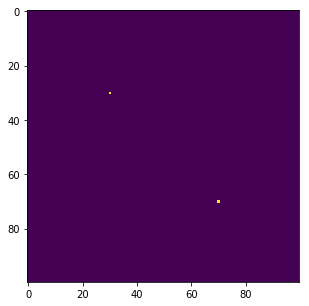

In [10]:
# num_side = 100
# X = np.zeros((num_side, num_side))
# # X = np.random.rand(50, 50)
# X[70, 70] = 1
# X[30, 30] = 1
X, cnt_lst = init_simulation()

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
im = ax.imshow(X, cmap='viridis', interpolation='nearest')

(100, 100)

In [12]:
def run_simulation(X, cnt_lst, steps=10):
    cnt = cnt_lst[-1]
    for _ in range(steps):
        for y,x in zip(np.where(X != 0)[0], np.where(X != 0)[1]):
            for i in range(-1, 2):
                for j in range(-1, 2):
                    if (i==0 and j==0):
                        continue
                    else:
                        xi, yj = x+i, y+j
                        # avoid beyond boundaries
                        if (xi < 0 or xi >= X.shape[1] or yj < 0 or yj >= X.shape[0]):
                            continue
                        else:
                            if X[yj, xi] == 1:  # ignore if already infected
                                continue
                            else:
                                X[yj, xi] = contagion(prob=0.2)
                                if X[yj, xi] == 1:
                                    cnt += 1
        cnt_lst.append(cnt)
    return X, cnt_lst

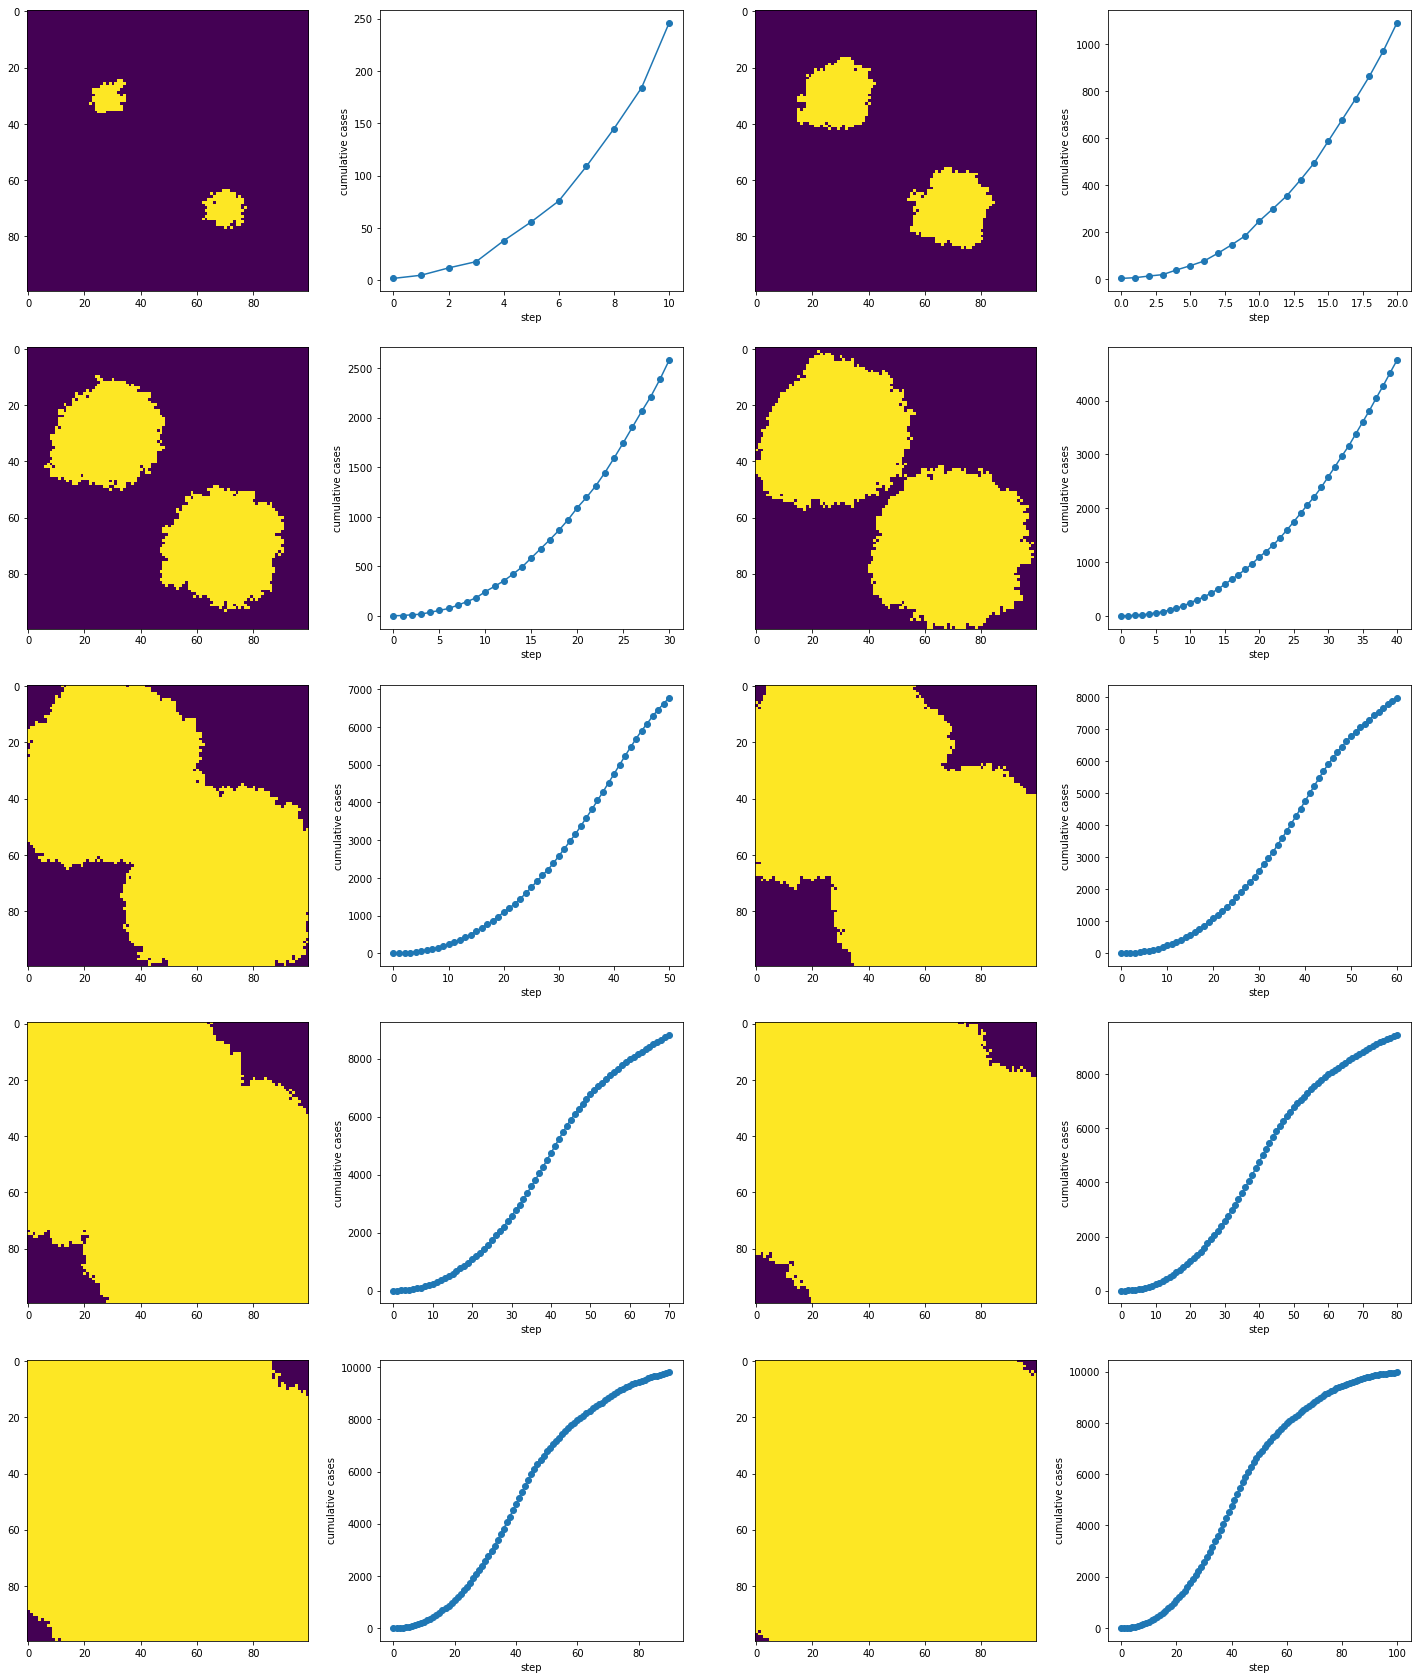

In [10]:
X, cnt_lst = init_simulation()
fig, ax = plt.subplots(5, 4)
fig.set_size_inches(25, 30)
for k in range(5):
    X, cnt_lst = run_simulation(X, cnt_lst, steps=3)
    ax[k,0].imshow(X, cmap='viridis', interpolation='nearest')
    ax[k,1].plot(cnt_lst, 'o-')
    ax[k,1].set_xlabel('step')
    ax[k,1].set_ylabel('cumulative cases')
    X, cnt_lst = run_simulation(X, cnt_lst, steps=3)
    ax[k,2].imshow(X, cmap='viridis', interpolation='nearest')
    ax[k,3].plot(cnt_lst, 'o-')
    ax[k,3].set_xlabel('step')
    ax[k,3].set_ylabel('cumulative cases')
# plt.tight_layout()
# fig.savefig('contagion_simulation.pdf', bbox_inches='tight');

In [11]:
fig.savefig('contagion_simulation.pdf', bbox_inches='tight');

In [8]:
from matplotlib.animation import FuncAnimation
from IPython import display

In [22]:
X, cnt_lst = init_simulation()

t0 = time()
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
plot0 = ax[0].plot([])[0]
plot1 = ax[1].plot([])[0]
# other static stuff
# ax[0].set_xlim(0, 2*np.pi)
# ax[0].set_ylim(-2, 2)
# ax[1].set_xlim(0, 2*np.pi)
# ax[1].set_ylim(-2, 2)
ax[1].set_xlabel('step')
ax[1].set_ylabel('cumulative cases')
plt.tight_layout()

def animate(X, cnt_lst, frame):
    ax[0].imshow(X, cmap='viridis', interpolation='nearest')
    X, cnt_lst = run_simulation(X, cnt_lst, steps=1)
    ax[1].plot(cnt_lst, 'ro-')
    
animt = FuncAnimation(fig, lambda x: animate(X, cnt_lst, x), frames=100, interval=200, repeat=False)
video = animt.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
runtime(t0)

2 min.


In [23]:
t0 = time()
animt.save('animt.gif', writer='imagemagick')
runtime(t0)

MovieWriter imagemagick unavailable. Trying to use pillow instead.


5 min.
